In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st

#Get current date now just so we have it every time we need it later on
year = str(time.gmtime()[0])
year = year[2:4] #only need the last 2 digits of year for the format used
month = time.gmtime()[1]
day = time.gmtime()[2]
if(month <= 10): #using mm/dd/yy format, so add a 0 if month <= 10
    month = "0" + str(month)
currentDate = f"({month}/{day}/{year})" #store date in the correct format to use every time it's needed later


# Import API key
from api_keys import weather_api_key #Put your API keys file in the same folder as this program

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#Observable Trends:
# 1) The temperature increases as you approach the equator (0 latitude) and as such, there are hardly any cities near 
#the extreme latitudes to either side, as nobody wants to live in a place as cold as antarctica full-time
# 2) Cloudiness and wind speed have almost no correlation with distance from equator
# 3) Many more cities have humidities above 50% than below

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
while len(cities) < 500: #while loop used to ensure that there are more than 500 unique cities in our list
    lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
    lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
    lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
    for lat_lng in lat_lngs:
        city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
        if city not in cities:
            cities.append(city)

In [4]:
#Perform API calls to get data on each city and store the data as a CSV file
url = f"http://api.openweathermap.org/data/2.5/weather?q=london&appid={weather_api_key}"   
response = requests.get(url).json()

#all the lists that we'll be using in the for loop iterating through the cities list we created earlier
citiesNew = []
test = []
Lat = []
Lon = []
TempMAX = []
Humidity = []
CCoverage = []
WindSpd = []
Country = []
DateTime = []
i = 1 #keep track of which record we're on
for city in cities:
    url = f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={weather_api_key}"
    response = requests.get(url).json()
    try:
        test.append(response["main"]["temp"])
        Lat.append(response["coord"]["lat"])
        Lon.append(response["coord"]["lon"])
        TempMAX.append((response["main"]["temp_max"] - 273.15) * (9/5) + 32)#Convert Kelvin to Farenheit
        Humidity.append(response["main"]["humidity"])
        CCoverage.append(response['clouds']["all"])
        WindSpd.append(response['wind']["speed"])
        Country.append(response['sys']["country"])
        DateTime.append(response['dt'])
        citiesNew.append(response["name"]) #Creating a new cities list only including ones where the api call succeeded
        newtest = response["name"] #just formatting the name to match how they appear in the openweather api
        print(f"Processing Record {i} | {newtest}") #print the city being processed and its number
        i+=1
    except(KeyError): 
        print("City not found. Skipping Entry") #if the city was not found via the api, inform the user

Processing Record 1 | Banjar
Processing Record 2 | Butaritari
Processing Record 3 | Torbay
Processing Record 4 | Punta Arenas
Processing Record 5 | Arica
City not found. Skipping Entry
Processing Record 6 | Ostrovnoy
Processing Record 7 | Puerto Ayora
Processing Record 8 | Manavalakurichi
Processing Record 9 | Port Alfred
Processing Record 10 | Dingle
Processing Record 11 | Norman Wells
Processing Record 12 | Tessalit
Processing Record 13 | Farnes
City not found. Skipping Entry
Processing Record 14 | Cape Town
Processing Record 15 | Saint George
Processing Record 16 | Lulea
Processing Record 17 | Mount Isa
Processing Record 18 | Codrington
Processing Record 19 | Dikson
Processing Record 20 | Bethel
Processing Record 21 | Rikitea
Processing Record 22 | Eyl
Processing Record 23 | Mataura
Processing Record 24 | Jamestown
Processing Record 25 | Mahebourg
Processing Record 26 | Faanui
Processing Record 27 | Hithadhoo
City not found. Skipping Entry
Processing Record 28 | Korla
Processing Rec

Processing Record 231 | Nam Som
Processing Record 232 | Tiarei
City not found. Skipping Entry
Processing Record 233 | Gazojak
Processing Record 234 | New Norfolk
Processing Record 235 | Mogadishu
Processing Record 236 | Guhagar
Processing Record 237 | Pahrump
Processing Record 238 | Mitsamiouli
Processing Record 239 | Sorland
Processing Record 240 | Bengkulu
Processing Record 241 | Mago
Processing Record 242 | Istria
Processing Record 243 | Yagodnoye
Processing Record 244 | Kyshtovka
Processing Record 245 | Mossamedes
Processing Record 246 | Shelburne
Processing Record 247 | Brainerd
Processing Record 248 | Tabat
Processing Record 249 | Luau
Processing Record 250 | Nanortalik
Processing Record 251 | Stornoway
Processing Record 252 | Ahipara
Processing Record 253 | Pekan
Processing Record 254 | Anadyr
Processing Record 255 | Uttaradit
Processing Record 256 | Tasiilaq
Processing Record 257 | Palmer
City not found. Skipping Entry
Processing Record 258 | Nichinan
Processing Record 259 | Sh

Processing Record 463 | Baghdad
Processing Record 464 | Talcahuano
Processing Record 465 | Saint-Louis
Processing Record 466 | Pangoa
Processing Record 467 | Ken Caryl
Processing Record 468 | Yishui
Processing Record 469 | Gangapur
Processing Record 470 | Otane
Processing Record 471 | Hasaki
Processing Record 472 | Avera
Processing Record 473 | Wanning
Processing Record 474 | Alofi
Processing Record 475 | Ramnagar
Processing Record 476 | Buraidah
Processing Record 477 | Jishou
Processing Record 478 | Okha
Processing Record 479 | Abilene
Processing Record 480 | Linxia
Processing Record 481 | Manokwari
Processing Record 482 | Vanimo
Processing Record 483 | Forsytheganj
Processing Record 484 | Liverpool
Processing Record 485 | San Andres
Processing Record 486 | Moron
Processing Record 487 | Manakara
Processing Record 488 | Beipiao
Processing Record 489 | Kalmunai
Processing Record 490 | Tchibanga
Processing Record 491 | Sokolo
Processing Record 492 | Puntarenas
City not found. Skipping En

In [5]:
#Convert all the city data we just gathered into a dataframe
cityInfoDF = pd.DataFrame({
    "City Latitude": Lat,
    "City Longitude": Lon,
    "Max Temperature": TempMAX,
    "Humidity": Humidity,
    "Cloud Coverage": CCoverage,
    "Wind Speed": WindSpd,
    "City Country": Country,
    "City Datetime": DateTime}, 
    index = citiesNew #set the cities' names as the index
)
cityInfoDF.index.name = "City Name"

cityInfoDF.to_csv("../output_data/cityinfo.csv", index=True, header=True) #export the data to an external CSV

,City Latitude,City Longitude,Max Temperature,Humidity,Cloud Coverage,Wind Speed,City Country,City Datetime
City Name,,,,,,,,
Banjar,-8.19,114.97,89.600,70,40,2.60,ID,1580095641
Butaritari,3.07,172.79,83.318,78,100,5.50,KI,1580095673
Torbay,47.67,-52.73,28.994,63,90,4.60,CA,1580095674
Punta Arenas,-53.15,-70.92,50.000,71,75,4.60,CL,1580095439
Arica,-18.48,-70.30,77.000,69,90,1.50,CL,1580095675
Ostrovnoy,68.05,39.51,6.692,94,99,5.36,RU,1580095676
Puerto Ayora,-0.74,-90.35,75.002,32,100,1.34,EC,1580095676
Manavalakurichi,8.13,77.30,80.600,69,20,1.50,IN,1580095677
Port Alfred,-33.59,26.89,60.998,79,18,1.79,ZA,1580095678


In [6]:
#Uncomment the below code and use while testing if you don't want to wait to access the api and create the entire dataframe again
#file = "../output_data/cityinfo.csv"
#cityInfoDF = pd.read_csv(file)

#### Latitude vs. Temperature Plot

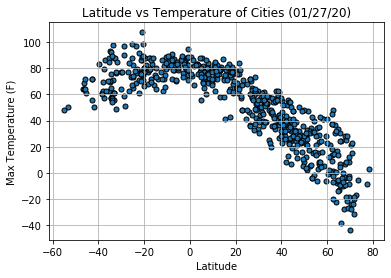

In [7]:
x_values = cityInfoDF["City Latitude"]
y_values = cityInfoDF["Max Temperature"]
plt.scatter(x_values,y_values,edgecolors='black', s=25) 
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title("Latitude vs Temperature of Cities " + currentDate) #put the date in (mm/dd/yy) at the end
plt.savefig('../output_data/Figure1Temperature.png') #Save the figure to a png file
plt.show() #display the figure

#This code creates a plot of the temperature at cities various distances away from the equator. 
#The usual result will be that temperatures are highest near the equator and drop at farther distances, near the edges of the graph

#### Latitude vs. Humidity Plot

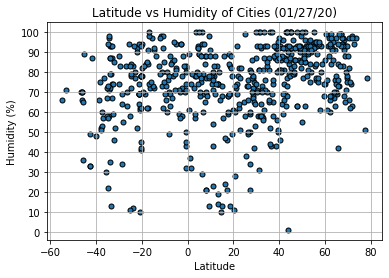

In [8]:
if cityInfoDF["Humidity"].max() <= 100: #while humidity is a percentage, it can be over 100
    yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
else:
    yticks = []
    i = 0
    while i < cityInfoDF["Humidity"].max():
        yticks.append(i)
        i += 20 #create a scale that reaches up past the highest humidity in increments of 20%
cityInfoDF.plot(kind="scatter", x="City Latitude", y="Humidity", grid=True, s=25,
    title="Latitude vs Humidity of Cities " + currentDate,  edgecolors='black', yticks = yticks)
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
plt.savefig('../output_data/Figure2Humidity.png') 
plt.show()

#This code produces a graph of the humidity at cities various distances away from the equator. 
#Cities anywhere can be humid or not, but most tend to be in the upper half of the humidity index above 50%

#### Latitude vs. Cloudiness Plot

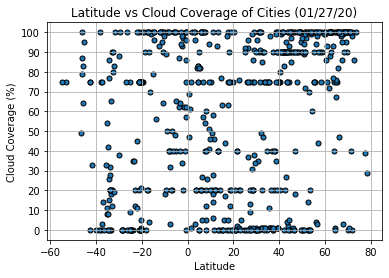

In [9]:
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100] #cloud coverage cannot be over 100% though

cityInfoDF.plot(kind="scatter", x="City Latitude", y="Cloud Coverage", grid=True, 
    title="Latitude vs Cloud Coverage of Cities " + currentDate, edgecolors='black', yticks = yticks, s= 25)
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)") 

plt.savefig('../output_data/Figure3Cloudiness.png') 
plt.show()

#This code produces a graph of the cloud coverage at cities various distances away from the equator
#Cloud coverage is all over the place, and cities anywhere can be either completely cloudy or cloud-free
#due to the nature of cloud coverage, the same cities could easily have the opposite status the next day, as well

#### Latitude vs. Wind Speed Plot

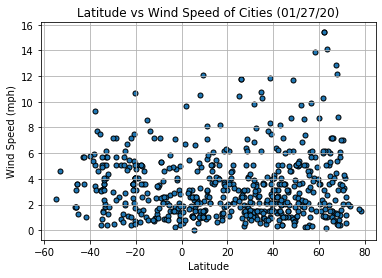

In [10]:
cityInfoDF.plot(kind="scatter", x="City Latitude", y="Wind Speed", grid=True, 
    title="Latitude vs Wind Speed of Cities " + currentDate, edgecolors='black', s= 25)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)") 
plt.savefig('../output_data/Figure4Windspeed.png') 
plt.show()

#This code produces a graph of the wind speed at cities various distances away from the equator. 
#Most cities tend to have a wind speed of under 10mph, but a few go higher. 

## Linear Regression

In [11]:
#A function used to create linear regression plots and display the r-squared value
def linreg(x_values, y_values):  
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.plot(x_values,regress_values,"r-")
    print(f"The r-squared is: {rvalue}")
    return line_eq

In [12]:
# Create Northern and Southern Hemisphere DataFrames
northInfoDF = cityInfoDF[cityInfoDF["City Latitude"] > 0] 
southInfoDF = cityInfoDF[cityInfoDF["City Latitude"] < 0]
#If a city is at exactly 0 degrees latitude, it will not be considered in either hemisphere
#and not show up in the following plots

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: -0.8900425252542743


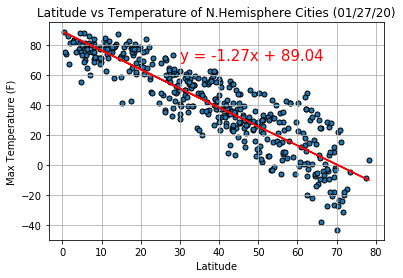

In [13]:
#Code mostly copied from the previous temperature graphs, but being focused on a single hemisphere and 
#now including linear regression as well
x_values = northInfoDF["City Latitude"]
y_values = northInfoDF["Max Temperature"]
plt.scatter(x_values,y_values,edgecolors='black', s=25) 
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title("Latitude vs Temperature of N.Hemisphere Cities " + currentDate) 
nTempLine = linreg(x_values,y_values) #call the function to get linear regression and pass it x/y values
plt.annotate(nTempLine,(30,70),fontsize=15,color="red") #display the linear regression equation on the plot
#this can end up being hard to read on some graphs, as it is set only to be displayed on the graph for sure,
#and the line or data points can end up obscuring it due to the generated nature of them
plt.savefig('../output_data/NHemisphereTemperature.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.4818718892715968


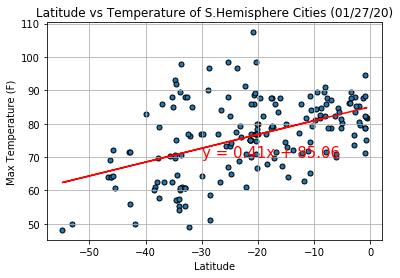

In [14]:
x_values = southInfoDF["City Latitude"]
y_values = southInfoDF["Max Temperature"]
plt.scatter(x_values,y_values,edgecolors='black', s=25) 
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)") 
plt.title("Latitude vs Temperature of S.Hemisphere Cities " + currentDate) 
sTempLine = linreg(x_values,y_values)
plt.annotate(sTempLine,(-30,70),fontsize=15,color="red")
plt.savefig('../output_data/SHemisphereTemperature.png')
plt.show()
#The linear regression is modeling the expected tempurature in cities at various distances away from the equator

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.33316583121317933


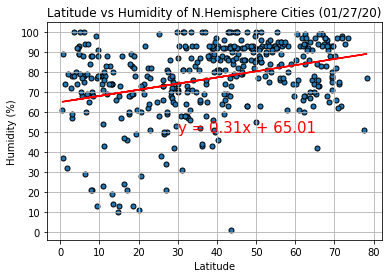

In [15]:
if northInfoDF["Humidity"].max() <= 100: #while humidity is a percentage, it can be over 100
    yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
else:
    yticks = []
    i = 0
    while i < cityInfoDF["Humidity"].max():
        yticks.append(i)
        i += 20 #create a scale that reaches up past the highest humidity in increments of 20%
northInfoDF.plot(kind="scatter", x="City Latitude", y="Humidity", grid=True, s=25,
    title="Latitude vs Humidity of N.Hemisphere Cities " + currentDate,  edgecolors='black', yticks = yticks)
x_values = northInfoDF["City Latitude"]
y_values = northInfoDF["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
nHumidLine = linreg(x_values,y_values)
plt.annotate(nHumidLine,(30,50),fontsize=15,color="red")
plt.savefig('../output_data/NHemisphereHumidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.2039312484053313


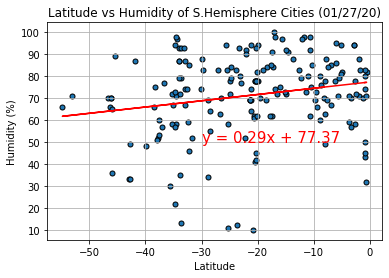

In [16]:
if southInfoDF["Humidity"].max() <= 100: #while humidity is a percentage, it can be over 100
    yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
else:
    yticks = []
    i = 0
    while i < cityInfoDF["Humidity"].max():
        yticks.append(i)
        i += 20 #create a scale that reaches up past the highest humidity in increments of 20%
southInfoDF.plot(kind="scatter", x="City Latitude", y="Humidity", grid=True, s=25,
    title="Latitude vs Humidity of S.Hemisphere Cities " + currentDate,  edgecolors='black', yticks = yticks)

x_values = southInfoDF["City Latitude"]
y_values = southInfoDF["Humidity"]
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)") 
sHumidLine = linreg(x_values,y_values)
plt.annotate(sHumidLine,(-30,50),fontsize=15,color="red")
plt.savefig('../output_data/SHemisphereHumidity.png')
plt.show()
#The linear regression is modeling the expected humidity in cities at various distances away from the equator

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.34706714866370103


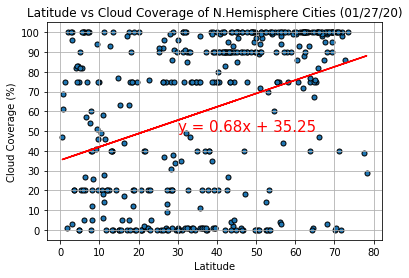

In [17]:
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

northInfoDF.plot(kind="scatter", x="City Latitude", y="Cloud Coverage", grid=True, 
    title="Latitude vs Cloud Coverage of N.Hemisphere Cities " + currentDate, edgecolors='black', yticks = yticks, s= 25)
x_values = northInfoDF["City Latitude"]
y_values = northInfoDF["Cloud Coverage"]
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)") 

nCloudLine = linreg(x_values,y_values)
plt.annotate(nCloudLine,(30,50),fontsize=15,color="red")
plt.savefig('../output_data/NHemisphereCloudiness.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.2644888943972459


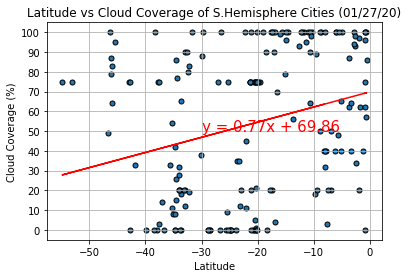

In [18]:
yticks = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]

southInfoDF.plot(kind="scatter", x="City Latitude", y="Cloud Coverage", grid=True, 
    title="Latitude vs Cloud Coverage of S.Hemisphere Cities " + currentDate, edgecolors='black', yticks = yticks, s= 25)
x_values = southInfoDF["City Latitude"]
y_values = southInfoDF["Cloud Coverage"]
plt.xlabel("Latitude")
plt.ylabel("Cloud Coverage (%)") 

sCloudLine = linreg(x_values,y_values)
plt.annotate(sCloudLine,(-30,50),fontsize=15,color="red")
plt.savefig('../output_data/SHemisphereCloudiness.png')
plt.show()
#The linear regression is modeling the expected cloud coverage over cities at various distances away from the equator
#however, this doesn't seem that reliable with how huge the variance is and how much cloud coverage can differ
#on other days

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.1084343999866565


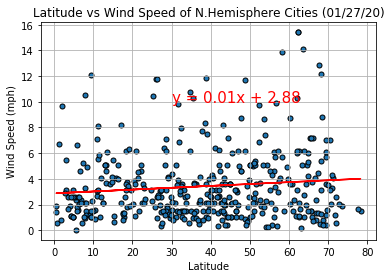

In [19]:
northInfoDF.plot(kind="scatter", x="City Latitude", y="Wind Speed", grid=True, 
    title="Latitude vs Wind Speed of N.Hemisphere Cities " + currentDate, edgecolors='black', s= 25)
x_values = northInfoDF["City Latitude"]
y_values = northInfoDF["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)") 

nWSpeedLine = linreg(x_values,y_values)
plt.annotate(nWSpeedLine,(30,10),fontsize=15,color="red")
plt.savefig('../output_data/NHemisphereWindspeed.png') 
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: -0.19587163089297602


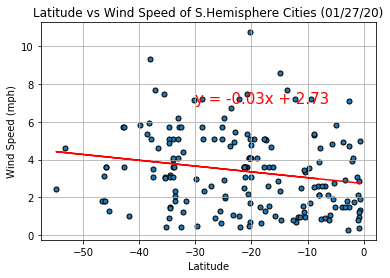

In [22]:
southInfoDF.plot(kind="scatter", x="City Latitude", y="Wind Speed", grid=True, 
    title="Latitude vs Wind Speed of S.Hemisphere Cities " + currentDate, edgecolors='black', s= 25)
x_values = southInfoDF["City Latitude"]
y_values = southInfoDF["Wind Speed"]
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)") 

nWSpeedLine = linreg(x_values,y_values)
plt.annotate(nWSpeedLine,(-30,7),fontsize=15,color="red")

plt.savefig('../output_data/SHemisphereWindspeed.png') 
plt.show()
#The linear regression is modeling the expected wind speed in cities at various distances away from the equator